In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [ ]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file("flower_photos",origin=dataset_url,untar=True)
data_dir=pathlib.Path(data_dir)

228827136/228813984 [==============================] - 3s 0us/step


In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


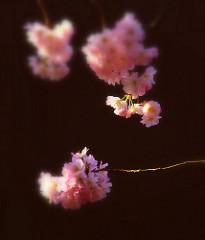

In [ ]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

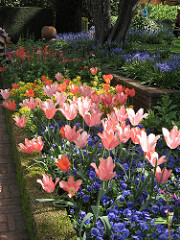

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[5]))

In [ ]:
#load dataset
batch_size=32
img_height=180
img_width=180

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                             validation_split=0.2,
                                                             subset="training",
                                                             seed=123,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


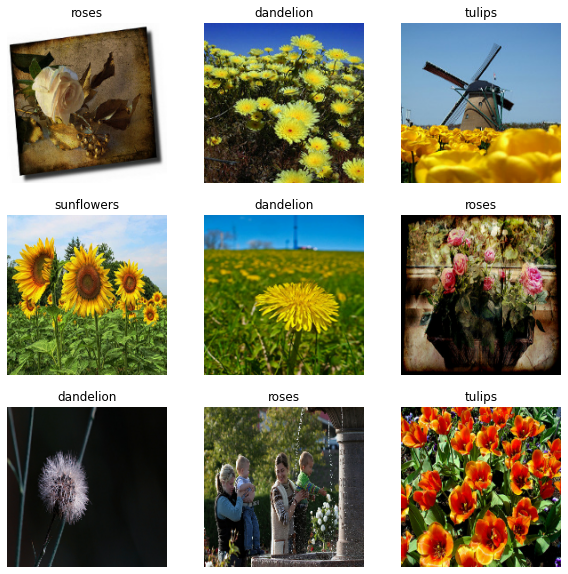

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                             validation_split=0.2,
                                                             subset="validation",
                                                             seed=123,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size)
AUTOTUNE=tf.data.experimental.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
#standardise the data
normalization_layer=layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch,labels_batch=next(iter(normalized_ds))
first_image=image_batch[0]
print(np.min(first_image),np.max(first_image))

0.0013072295 0.9977125


In [ ]:
#create a model
num_classes=5
model=Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                  layers.Conv2D(16,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(128,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(128,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Flatten(),
                  layers.Dense(128,activation='relu'),
                  layers.Dense(num_classes)

])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['Accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 128)       18560     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 128)      

In [ ]:
epochs=10
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
92/92 [==============================] - 10s 96ms/step - loss: 1.3209 - Accuracy: 0.4343 - val_loss: 1.0709 - val_Accuracy: 0.5531
Epoch 2/10
92/92 [==============================] - 8s 84ms/step - loss: 0.9988 - Accuracy: 0.6073 - val_loss: 0.9780 - val_Accuracy: 0.5790
Epoch 3/10
92/92 [==============================] - 8s 84ms/step - loss: 0.8298 - Accuracy: 0.6805 - val_loss: 0.8831 - val_Accuracy: 0.6376
Epoch 4/10
92/92 [==============================] - 8s 84ms/step - loss: 0.6461 - Accuracy: 0.7514 - val_loss: 0.8588 - val_Accuracy: 0.6594
Epoch 5/10
92/92 [==============================] - 8s 84ms/step - loss: 0.4414 - Accuracy: 0.8403 - val_loss: 1.1294 - val_Accuracy: 0.6362
Epoch 6/10
92/92 [==============================] - 8s 84ms/step - loss: 0.2730 - Accuracy: 0.9060 - val_loss: 1.2362 - val_Accuracy: 0.6635
Epoch 7/10
92/92 [==============================] - 8s 84ms/step - loss: 0.1282 - Accuracy: 0.9598 - val_loss: 1.6368 - val_Accuracy: 0.6621
Epoch 8/10
9

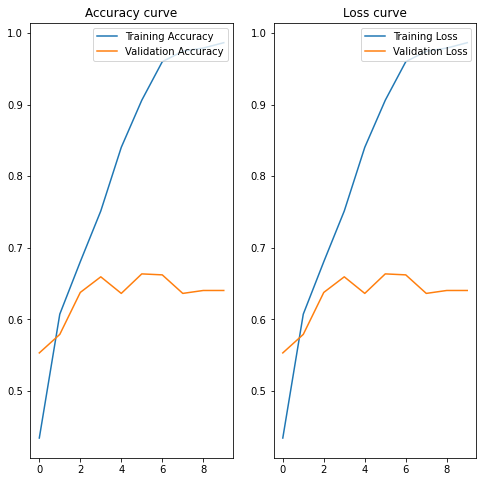

In [ ]:
acc=history.history['Accuracy']
val_acc=history.history['val_Accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title("Accuracy curve")

plt.subplot(1,2,2)
plt.plot(epochs_range,acc,label='Training Loss')
plt.plot(epochs_range,val_acc,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Loss curve")
plt.show()